In [1]:
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from collections import Counter
import numpy as np
import pandas as pd
import re
import emoji
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/shixin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shixin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shixin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/shixin/nltk_data...


True

In [29]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = emoji.replace_emoji(text, '')  # This removes emojis
    text = text.lower()

    text = re.sub(r'\b\w*[\./]\w*\b', '', text)

    # Remove URLs (http, https, www)
    text = re.sub(r'http\S+|www\S+', '', text)


    # Remove all punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    
    text = re.sub(r'\w*\d+\w*', '', text)
    
    
    text = re.sub(r'\b[!@$]\w*\b', '', text)


    text = re.sub(r'na$', '', text)

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    all_stopwords = stop_words.union(custom_stopwords)
    tokens = [token for token in tokens if token not in all_stopwords]

    
    return " ".join(tokens)


In [21]:
file_path = 'episodes_V2.csv'

data = pd.read_csv(file_path)

data = data[data['duration_ms'] > 60000]

data = data[data['description'].apply(lambda x: len(str(x).split()) > 20)]




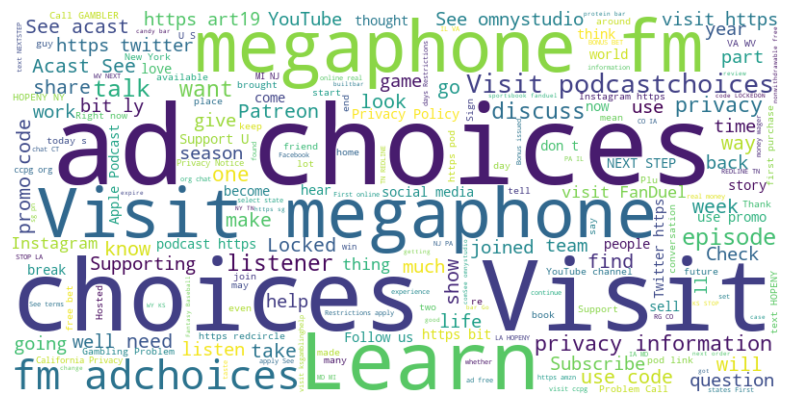

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = " ".join(data['description'].dropna())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.show()


In [91]:

custom_stopwords = set([
    "topic", "topics", "sponsor", "sponsors", "disclaimer", "follow", "support", "website", 
    "spotify", "watch", "lex", "exclusive", "free", "youtube", "check", "join", "shopify",
    "listen", "links", "subscribe", "new", "click", "timestamps", "timestamp", "transcript", 
    "rss", "expressvpn", "netsuite", "introduction", "coupon", "code", "offer", "discount", 
    "promo", "deal", "episode", "episodes", "patreon", "linkedin", "instagram", "twitter", 
    "facebook", "podcast", "podcasts", "visit", "ad", "adchoices", "na", "youd", "dont", "podcast", "app", "acast",
    'al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 
    'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nc', 'nd', 'oh', 'ok', 'or', 'pa', 
    'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy', 'california', 'information',
    'privacy', 'policy', 'hopeny', 'see', 'redline', 'learn', 'choices', 'hosted','expire', 'nextstep','state',
    'select', 'california', 'online', 'apply', 'youll', 'call', 'text', 'expires', 'terms', 'gametime', 'nonwithdrawable',
    'powered', 'voicefeed', 'conditions', 'bonus'
])

data['cleaned_description'] = data['description'].apply(preprocess_text)


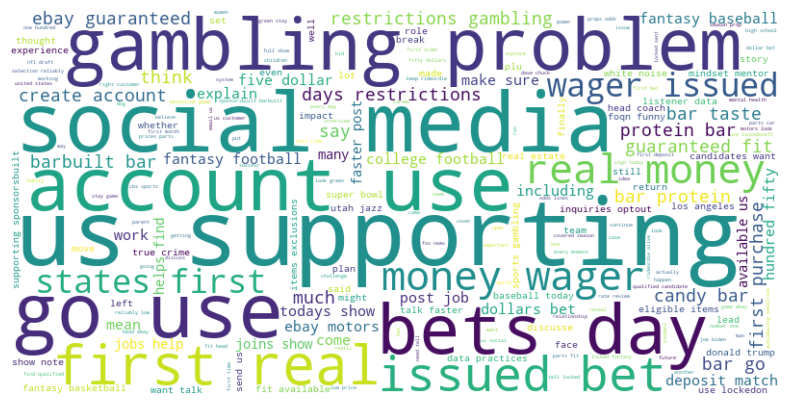

In [92]:
text = " ".join(data['cleaned_description'].dropna())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.show()


In [93]:
data.to_csv('episodes_V5.csv')

In [78]:
data.drop(['release_date','duration_minutes', 'explicit','language','duration_ms','is_externally_hosted', 'is_playable','languages','release_date_precision','Unnamed: 0'],axis=1).to_csv('espisodes_V4.csv')